In [2]:
from source import data_import
import pyarrow as pa
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
p_df5 = data_import.import_patients(patient_ids=[1,2,3,4,5], seizure_flag=True)

chb01_03.edf was import but not resampled 256Hz.
chb01_03.edf seizure and buffer was labeled
chb01_04.edf was import but not resampled 256Hz.
chb01_04.edf seizure and buffer was labeled
chb01_15.edf was import but not resampled 256Hz.
chb01_15.edf seizure and buffer was labeled
chb01_16.edf was import but not resampled 256Hz.
chb01_16.edf seizure and buffer was labeled
chb01_18.edf was import but not resampled 256Hz.
chb01_18.edf seizure and buffer was labeled
chb01_21.edf was import but not resampled 256Hz.
chb01_21.edf seizure and buffer was labeled
chb01_26.edf was import but not resampled 256Hz.
chb01_26.edf seizure and buffer was labeled
patient chb01 sessions concatenated.
chb02_16+.edf was import but not resampled 256Hz.
chb02_16+.edf seizure and buffer was labeled
chb02_16.edf was import but not resampled 256Hz.
chb02_16.edf seizure and buffer was labeled
chb02_19.edf was import but not resampled 256Hz.
chb02_19.edf seizure and buffer was labeled
patient chb02 sessions concaten

In [4]:
# to save a dataframe for memory mapping
data_import.save_pyarrow(p_df, file_name="my_data")

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow was successfully written.


In [15]:
data_import.save_pyarrow(p_df5, file_name="my_data")

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow was successfully written.


In [5]:
# to load it with memory mapping
p_df_mem = data_import.load_pyarrow(file_name="my_data")
p_df_mem.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow was loaded.


(65893376, 26)

In [16]:
p_df_mem5 = data_import.load_pyarrow(file_name="my_data")
p_df_mem5.shape

/Users/anabroggini/Documents/bootcamp/ai2/source/../data/my_data.arrow was loaded.


(29092608, 26)

<Axes: >

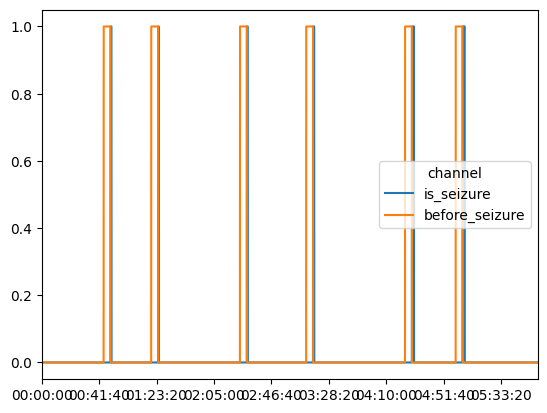

In [26]:
p_df_mem.loc[:"05H", ['is_seizure', 'before_seizure']].astype(int).plot()

In [18]:
grouped_mean = p_df_mem5.groupby(['is_seizure']).mean().reset_index()
grouped_mean.head()

channel,is_seizure,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,before_seizure,ECG
0,False,0.162665,0.242393,0.108956,0.201152,0.170800,0.177151,0.153888,0.201403,0.213668,...,0.176664,0.246360,0.190541,0.281764,0.129470,0.191071,0.233876,0.126074,0.068320,0.241945
1,True,0.353884,0.252732,0.193931,0.315057,0.338851,0.227883,0.236647,0.261479,0.198940,...,0.275634,0.336244,0.303375,0.196789,0.144147,0.220175,0.094427,0.272559,0.013145,0.160495


In [45]:
grouped_mean

channel,is_seizure,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
0,False,0.162665,0.242393,0.108956,0.201152,0.170800,0.177151,0.153888,0.201403,0.213668,...,0.242726,0.126074,0.176664,0.246360,0.190541,0.281764,0.129470,0.191071,0.233876,0.126074
1,True,0.353884,0.252732,0.193931,0.315057,0.338851,0.227883,0.236647,0.261479,0.198940,...,0.210698,0.272559,0.275634,0.336244,0.303375,0.196789,0.144147,0.220175,0.094427,0.272559


In [24]:
melted_data = pd.melt(grouped_mean, id_vars=['is_seizure'], 
                      var_name='Channel', value_name='Mean')

melted_data.sort_values(by = 'Mean', ascending=False)


,is_seizure,Channel,Mean
1,True,FP1-F7,0.353884
9,True,FP1-F3,0.338851
33,True,FZ-CZ,0.336244
7,True,P7-O1,0.315057
35,True,CZ-PZ,0.303375
21,True,C4-P4,0.296623
36,False,P7-T7,0.281764
31,True,P8-O2,0.275634
45,True,T8-P8-1,0.272559
29,True,T8-P8-0,0.272559


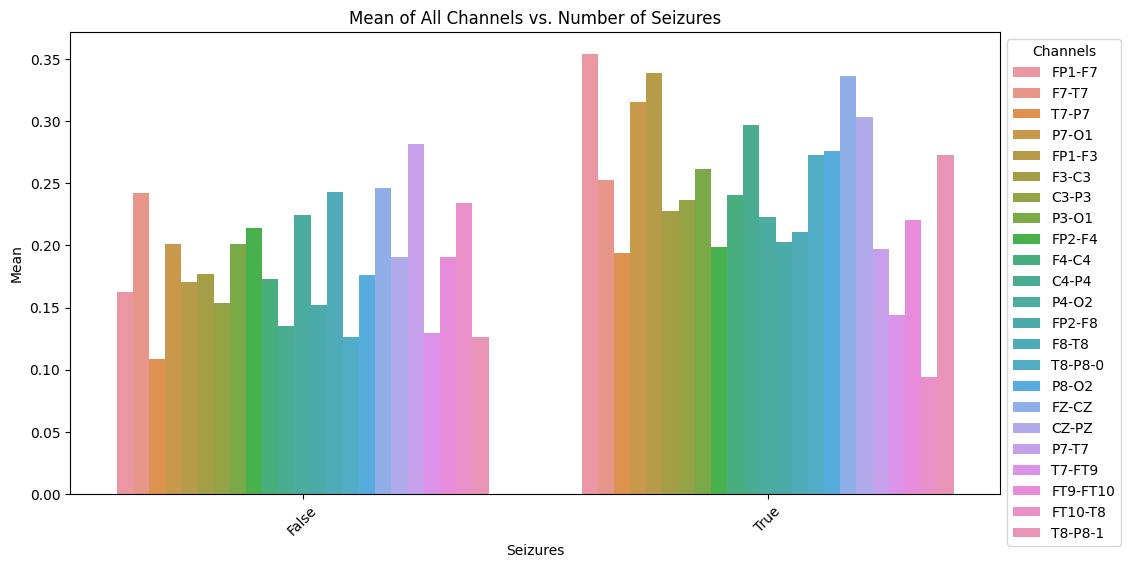

In [25]:

# Create a grouped bar plot to visualize means of all channels
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_data, x='is_seizure', y='Mean', hue='Channel')
plt.title('Mean of All Channels vs. Number of Seizures')
plt.xlabel('Seizures')
plt.ylabel('Mean')
plt.xticks(rotation=45)
plt.legend(title='Channels', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
NFFT=256 ## window size
noverlap=128 ## 50% overlap

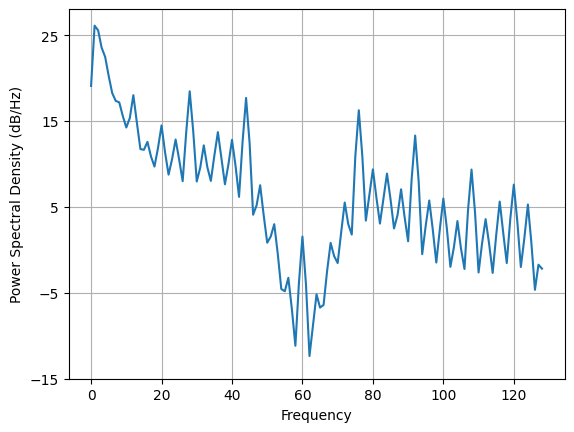

In [69]:
psd_dB, freq,line = plt.psd(p_df_mem5['C3-P3'], NFFT=256, detrend="mean",Fs=256, noverlap=128, scale_by_freq=True, return_line=True)

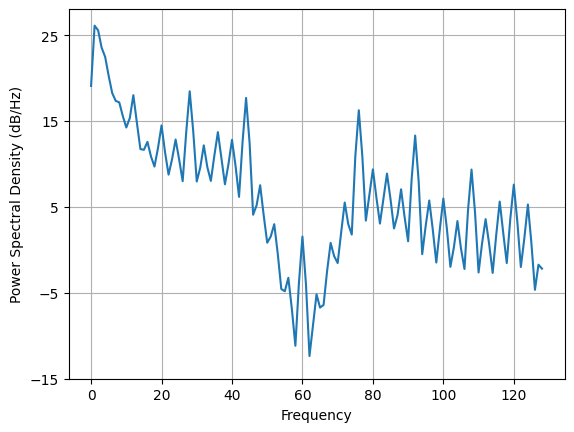

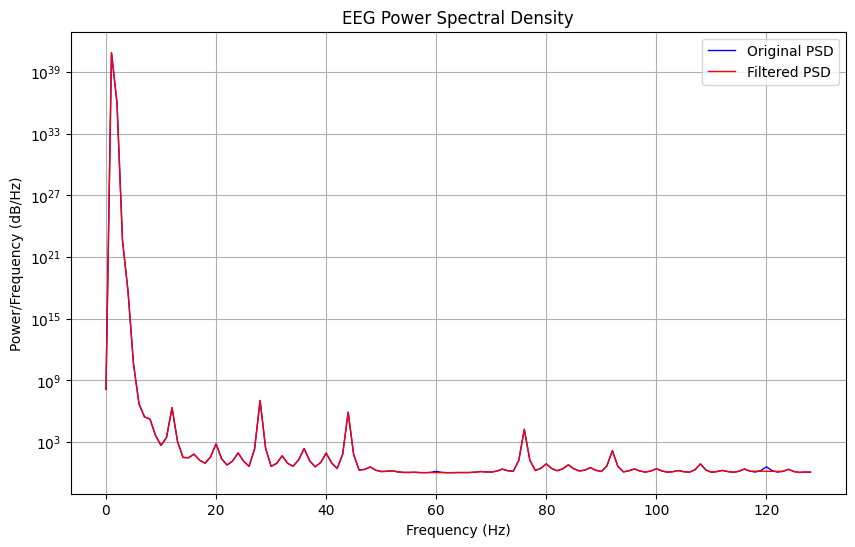

In [77]:
import matplotlib.pyplot as plt

# Original PSD calculation
psd_dB, freq = plt.psd(p_df_mem5['C3-P3'], NFFT=256, Fs=256,  detrend="mean", noverlap=128, scale_by_freq=True)

# Define the frequency range to exclude
exclude_range = [58, 62]  # Exclude frequencies around 60 Hz
exclude_range2 = [118, 122]  # Exclude frequencies around 120 Hz

# Create boolean masks to filter frequencies in the specified range
mask = (freq < exclude_range[0]) | (freq > exclude_range[1])
mask2 = (freq < exclude_range2[0]) | (freq > exclude_range2[1])

# Apply the masks to both the frequencies and PSD arrays
filtered_frequencies = freq[mask & mask2]
filtered_psd = psd_dB[mask & mask2]

# Plot the original and filtered PSD with the same scale and parameters
plt.figure(figsize=(10, 6))
plt.semilogy(freq, 10 ** (psd_dB / 10), label='Original PSD', color='blue',lw=1)  # Original PSD
plt.semilogy(filtered_frequencies, 10 ** (filtered_psd / 10), label='Filtered PSD', color='red',lw=1)  # Filtered PSD
plt.title("EEG Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (dB/Hz)")
#plt.ylim(1, 10000)  # Set the y-axis limits to match the original PSD scale
plt.legend()
plt.grid()
plt.show()


In [46]:
# Define the frequency range to exclude
exclude_range = [58, 62]  # Exclude frequencies around 60 Hz
exclude_range2 = [118, 122]  # Exclude frequencies around 120 Hz

# Create boolean masks to filter frequencies in the specified range
mask = (freq < exclude_range[0]) | (freq > exclude_range[1])
mask2 = (freq < exclude_range2[0]) | (freq > exclude_range2[1])

# Apply the masks to both the frequencies and PSD arrays
filtered_frequencies = freq[mask & mask2]
filtered_psd = psd_dB[mask & mask2]


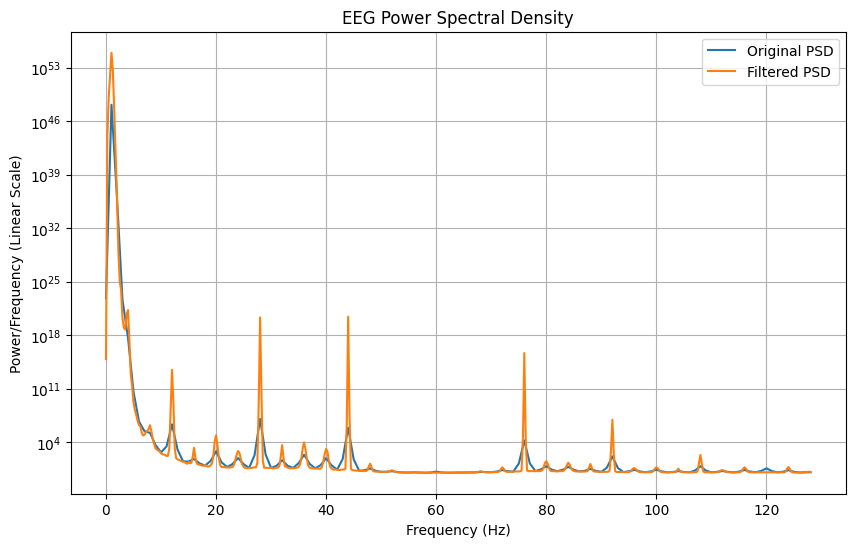

In [58]:
plt.figure(figsize=(10, 6))
plt.semilogy(freq, 10 ** (psd_dB / 10), label='Original PSD')  # Original PSD
plt.semilogy(filtered_frequencies, 10 ** (filtered_psd / 10), label='Filtered PSD')  # Filtered PSD
plt.title("EEG Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency (Linear Scale)")
plt.legend()
plt.grid()
plt.show()

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


In [79]:
# Set STFT parameters
fs = 256  # Sampling frequency (in Hz)
nperseg = 256  # Window size
noverlap = 128  # Overlap

# Calculate the STFT
frequencies, times, Sxx = spectrogram(p_df_mem5['C3-P3'], fs=fs, nperseg=nperseg, noverlap=noverlap)


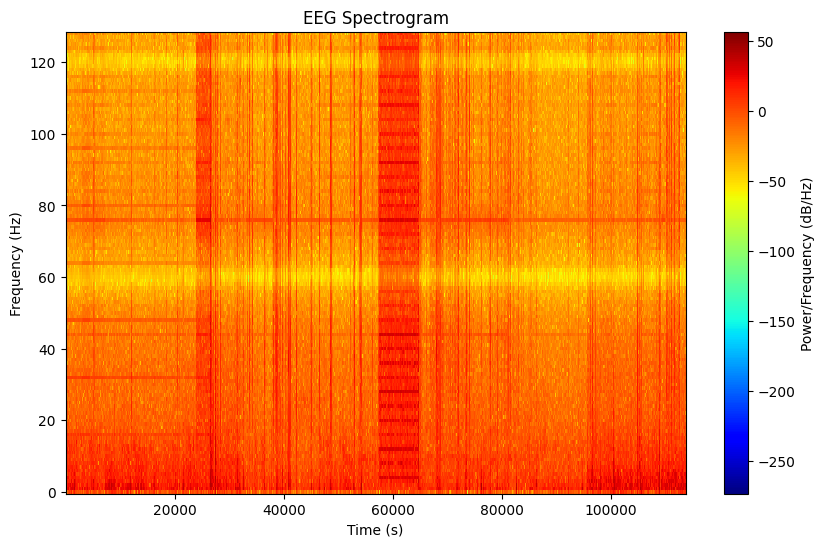

In [114]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx),cmap='jet' )  # Convert to dB
plt.title("EEG Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.show()

In [133]:
import pandas as pd
from scipy.signal import butter, lfilter

def filter_eeg_channels(df, channels, fs=256, exclude_ranges=None, Q=30):
    """
    Filter EEG channels in a DataFrame using band-stop filters.

    Parameters:
    - df: DataFrame containing EEG data.
    - channels: List of channel names to filter.
    - fs: Sampling frequency (default is 256 Hz).
    - exclude_ranges: List of exclusion ranges, e.g., [[58, 62], [118, 122]].
    - Q: Quality factor for notch filters (default is 30).

    Returns:
    - filtered_df: DataFrame with filtered EEG data.
    """
    filtered_df = df.copy()
    
    if exclude_ranges is None:
        exclude_ranges = []

    for channel in channels:
        for exclude_range in exclude_ranges:
            nyquist = 0.5 * fs
            low = (exclude_range[0] - 1.0) / nyquist
            high = (exclude_range[1] + 1.0) / nyquist

            b, a = butter(4, [low, high], btype='bandstop')
            filtered_eeg_data = lfilter(b, a, filtered_df[channel])
            filtered_df[channel] = filtered_eeg_data

    return filtered_df

# Example usage:
# Define your DataFrame and list of channels
# filtered_data = filter_eeg_channels(your_dataframe, your_channels)


In [132]:
channels = p_df_mem5.columns.drop(["is_seizure", 'before_seizure', 'ECG'])
channels

Index(['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3',
       'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
       'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10',
       'FT10-T8', 'T8-P8-1'],
      dtype='object', name='channel')

In [134]:
exclude_ranges=[[58, 62], [118, 122]]
df = p_df_mem5
fit_df = filter_eeg_channels(df, channels, fs=256, exclude_ranges=exclude_ranges, Q=30)

In [137]:
fit_df["T7-P7"]

0 days 00:00:00             -2.525164
0 days 00:00:00.003906250   -0.726857
0 days 00:00:00.007812500   -0.017454
0 days 00:00:00.011718750   -0.945918
0 days 00:00:00.015625       1.467580
                               ...   
1 days 07:34:02.980468750    3.610290
1 days 07:34:02.984375       3.794164
1 days 07:34:02.988281250    2.997109
1 days 07:34:02.992187500    3.363040
1 days 07:34:02.996093750    5.862600
Name: T7-P7, Length: 29092608, dtype: float64

In [173]:
a= fit_df.loc["05:00:00":"05:10:00",["T7-P7"]]
fs = 256  # Sampling frequency (in Hz)
nperseg = 128  # Window size
noverlap = 32  # Overlap

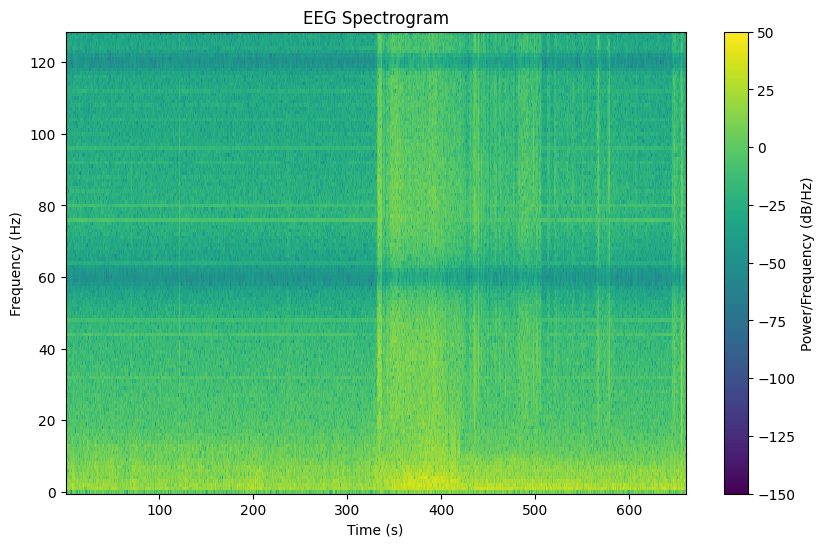

In [174]:
# Set STFT parameters
fs = 256  # Sampling frequency (in Hz)
nperseg = 256  # Window size
noverlap = 128  # Overlap

# Calculate the STFT
#frequencies, times, Sxx = spectrogram(fit_df["T7-P7"], fs=fs, nperseg=nperseg, noverlap=noverlap)
frequencies, times, Sxx = spectrogram(a["T7-P7"].values, fs=fs, nperseg=nperseg, noverlap=noverlap)
plt.figure(figsize=(10, 6))
cax =plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))  # Convert to dB
plt.title("EEG Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

cbar = plt.colorbar(cax)  # Use cax to associate colorbar with the ScalarMappable
cbar.set_label('Power/Frequency (dB/Hz)')

# Change the colorbar limits (replace vmin and vmax with your desired limits)
cax.set_clim(-150, 50)

plt.show()

<Axes: >

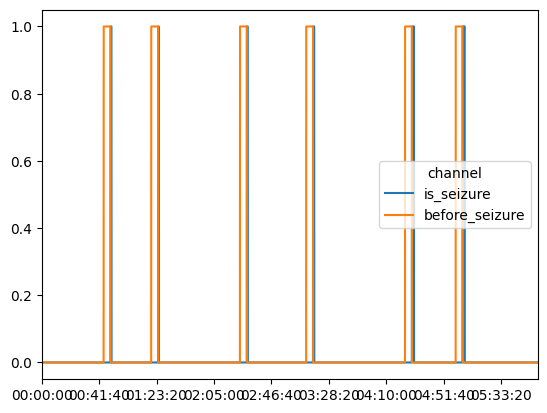

In [142]:
fit_df.loc[:"05H", ['is_seizure', 'before_seizure']].astype(int).plot()

In [175]:
## Selecting only a small snippet to visualize
a= fit_df.loc["05:00:00":"05:10:00",["T7-P7"]]
a["T7-P7"].values

array([ -5.07417342,  -1.37519067,   0.61162463, ..., -54.27374563,
       -52.05612914, -59.77429669])

In [163]:
fs = 256  # Sampling frequency (in Hz)
nperseg = 128  # Window size
noverlap = 32  # Overlap

In [182]:
# Calculate the STFT (Short-Time Fourier Transform)
frequencies, times, Sxx = spectrogram(a["T7-P7"].values, fs=fs, nperseg=nperseg, noverlap=noverlap)

# Normalize the spectrogram to the range [0, 1]
min_values = Sxx.min(axis=0, keepdims=True)
max_values = Sxx.max(axis=0, keepdims=True)
normalized_Sxx = (Sxx - min_values) / (max_values - min_values)

In [179]:
## 2nd way to normalize using zsore
import numpy as np


mean_value = np.mean(Sxx, axis=0, keepdims=True)
std_deviation = np.std(Sxx,axis=0, keepdims=True)

# Normalize the spectrogram using z-score (standardization)
normalized_Sxx = (Sxx - mean_value) / std_deviation


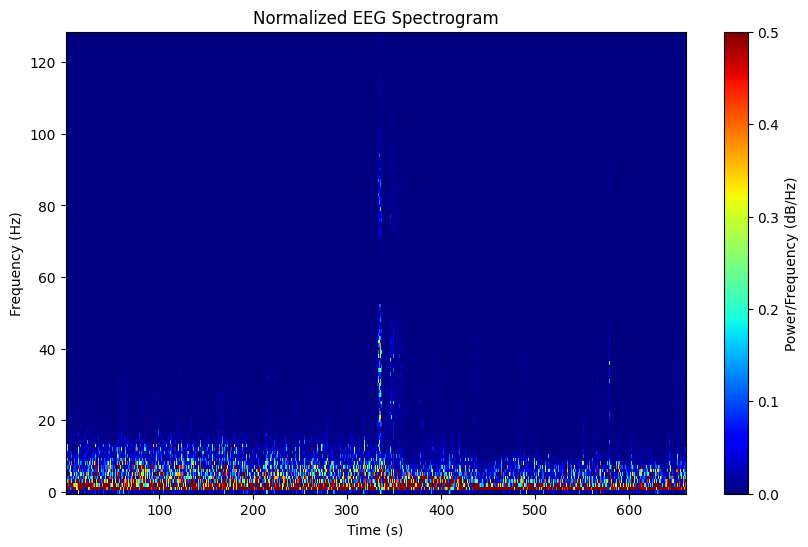

: 

In [183]:
# Plot the normalized spectrogram
plt.figure(figsize=(10, 6))
cax =plt.pcolormesh(times, frequencies, normalized_Sxx, cmap='jet')  # Use cmap to set the colormap
plt.title("Normalized EEG Spectrogram")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
cbar = plt.colorbar(label='Normalized Power/Frequency')  # Use cax to associate colorbar with the ScalarMappable
cbar.set_label('Power/Frequency (dB/Hz)')
cax.set_clim(0, 1)
plt.show()
